In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import lightgbm as lgb
warnings.filterwarnings('ignore')

In [2]:
%cd D:\资料\Columbia\Coursework\Python for DS\Assignment\KKbox\  

D:\资料\Columbia\Coursework\Python for DS\Assignment\KKbox


In [3]:
#read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
members = pd.read_csv('members.csv')
songs = pd.read_csv('songs.csv')
songs_extra = pd.read_csv( 'song_extra_info.csv')

In [4]:
#Extract data from songs_extra
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan
        
songs_extra['song_year'] = songs_extra['isrc'].apply(isrc_to_year)
songs_extra.drop(['isrc', 'name'], axis = 1, inplace = True)

Inspect the dataset

In [6]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [7]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [8]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [9]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [10]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [11]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [12]:
songs_extra.head()

,song_id,song_year
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,2012.0
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,2016.0
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,2008.0
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,2013.0
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,2013.0


In [13]:
songs_extra.describe()

,song_year
count,2.159423e+06
mean,2.006794e+03
std,1.344939e+01
min,1.918000e+03
25%,2.004000e+03
50%,2.011000e+03
75%,2.015000e+03
max,2.017000e+03


## Step1: data preparation
### 1. merge three data sets (train, members, songs) & (test, members, songs) according to msno and song_id

In [5]:
#merge three data sets
train_full = pd.merge(train, members, on = 'msno', how = 'left')
train_full = pd.merge(train_full, songs, on = 'song_id', how='left')
train_full = train_full.merge(songs_extra, on = 'song_id', how = 'left')

In [9]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 19 columns):
msno                      object
song_id                   object
source_system_tab         object
source_screen_name        object
source_type               object
target                    int64
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
expiration_date           int64
song_length               float64
genre_ids                 object
artist_name               object
composer                  object
lyricist                  object
language                  float64
song_year                 float64
dtypes: float64(3), int64(6), object(10)
memory usage: 1.1+ GB


### There are over 7 million rows, we have a very large dataset! 

In [10]:
train_full.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,song_year
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,2016.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,1999.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,2006.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,2010.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,2016.0


In [11]:
pd.options.display.float_format = "{:.2f}".format
train_full.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date,song_length,language,song_year
count,7377418.00,7377418.00,7377418.00,7377418.00,7377418.00,7377418.00,7377304.00,7377268.00,6799560.00
mean,0.50,7.51,17.54,6.79,20128104.11,20171565.87,245120.97,18.61,2011.23
std,0.50,6.64,21.55,2.28,30172.81,3869.83,67344.71,21.18,6.68
min,0.00,1.00,-43.00,3.00,20040326.00,19700101.00,1393.00,-1.00,1918.00
25%,0.00,1.00,0.00,4.00,20110705.00,20170911.00,214726.00,3.00,2009.00
50%,1.00,5.00,21.00,7.00,20131023.00,20170926.00,241812.00,3.00,2014.00
75%,1.00,13.00,29.00,9.00,20151022.00,20171006.00,272160.00,52.00,2016.00
max,1.00,22.00,1051.00,13.00,20170131.00,20201017.00,10851706.00,59.00,2017.00


In [6]:
#merge three data sets for test data
######note!!! might not need these later
test_full = pd.merge(test, members, on = 'msno', how = 'left')
test_full = pd.merge(test_full, songs, on = 'song_id', how='left')
test_full = test_full.merge(songs_extra, on = 'song_id', how = 'left')

In [13]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 19 columns):
id                        int64
msno                      object
song_id                   object
source_system_tab         object
source_screen_name        object
source_type               object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
expiration_date           int64
song_length               float64
genre_ids                 object
artist_name               object
composer                  object
lyricist                  object
language                  float64
song_year                 float64
dtypes: float64(3), int64(6), object(10)
memory usage: 390.1+ MB


### 2. data cleaning

Now check if there is any missing value in the data

In [14]:
missing_value = pd.DataFrame(train_full.isna().sum())
missing_value['percentage'] = missing_value[0]/train_full.shape[0] * 100
missing_value.set_axis(['missing value count', 'percentage'],axis=1, inplace=True)

In [15]:
missing_value

,missing value count,percentage
msno,0,0.00
song_id,0,0.00
source_system_tab,24849,0.34
source_screen_name,414804,5.62
source_type,21539,0.29
target,0,0.00
city,0,0.00
bd,0,0.00
gender,2961479,40.14
registered_via,0,0.00


In [16]:
missing_value_test = pd.DataFrame(test_full.isna().sum())
missing_value_test['percentage'] = missing_value_test[0]/test_full.shape[0] * 100
missing_value_test.set_axis(['missing value count', 'percentage'],axis=1, inplace=True)

In [17]:
missing_value_test

,missing value count,percentage
id,0,0.00
msno,0,0.00
song_id,0,0.00
source_system_tab,8442,0.33
source_screen_name,162883,6.37
source_type,7297,0.29
city,0,0.00
bd,0,0.00
gender,1052224,41.15
registered_via,0,0.00


We will impute values for missing data in 'song_length'. Except 'song_length', we think other NAs are all unknown information, and thus, we would input 'unknown' for NA.

In [7]:
# Clean NA in train set
for i in train_full.select_dtypes(include=['object']).columns:
    train_full[i][train_full[i].isnull()] = 'unknown'
train_full['song_length'].fillna((train_full['song_length'].mean()), inplace=True)
train_full.fillna(value=0, inplace=True)
train_full.song_id = train_full.song_id.astype('category')

In [8]:
#Clean NA in test set
for i in test_full.select_dtypes(include=['object']).columns:
    test_full[i][test_full[i].isnull()] = 'unknown'
test_full['song_length'].fillna((test_full['song_length'].mean()), inplace=True)
test_full.fillna(value=0, inplace=True)
test_full.song_id = test_full.song_id.astype('category')

In [9]:
train_full.isnull().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
song_year                 0
dtype: int64

In [21]:
test_full.isnull().sum()

id                        0
msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
song_year                 0
dtype: int64

Now we don't have missing values! Good job.
Next step, we are going to fix data type.

In [22]:
#check outliers in age
train_full['bd'].describe()

count   7377418.00
mean         17.54
std          21.55
min         -43.00
25%           0.00
50%          21.00
75%          29.00
max        1051.00
Name: bd, dtype: float64

In [23]:
#Check outliers in age
train_full.bd.value_counts()[0:10,]

0     2940499
25     261906
24     258688
26     257869
22     255731
27     253065
28     232548
23     228255
21     222087
29     211192
Name: bd, dtype: int64

In [24]:
#Check outliers in test data
test_full.bd.value_counts()[0:10,]

0     1043221
26      88142
25      85467
22      85089
27      85073
23      82780
24      82561
28      82301
29      77826
30      68238
Name: bd, dtype: int64

(-10, 100)

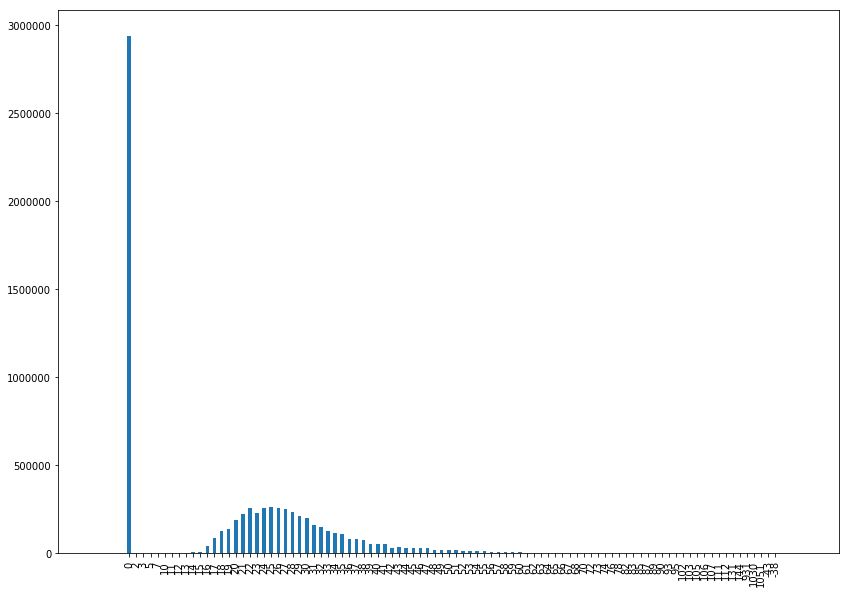

In [29]:
#Visualize outliers in age
import numpy as np
plt.figure(figsize=(14,10))
train_full['bd'].value_counts(sort=False).plot.bar()
plt.xlim([-10,100])

50% of the age is 0, max age is 1051. So we are going to replace those outliers with mean

In [10]:
#Remove user records with age > 80
train_full = train_full[train_full['bd'] <= 80]

In [11]:
#replace outliers,which are extrmely huge,  with 80
test_full.loc[test_full['bd']>=80, 'bd'] = 80

In [12]:
#Set users with age <= 7 with average user age
mean_user_age = np.mean(train_full[train_full['bd'] > 7]['bd'])
mean_user_age

28.722607104247036

In [13]:
#Check the mean user age in test 
mean_user_age1 = np.mean(train_full[train_full['bd'] > 7]['bd'])
mean_user_age1

28.722607104247036

In [14]:
train_full.loc[train_full['bd']<=7, 'bd'] = mean_user_age
test_full.loc[test_full['bd']<=7, 'bd'] = mean_user_age1

In [15]:
train_full.bd.describe()

count    7.370018e+06
mean     2.872261e+01
std      6.650970e+00
min      1.000000e+01
25%      2.600000e+01
50%      2.872261e+01
75%      2.900000e+01
max      7.800000e+01
Name: bd, dtype: float64

In [16]:
test_full.bd.describe()

count    2.556790e+06
mean     2.887099e+01
std      6.771602e+00
min      1.000000e+01
25%      2.600000e+01
50%      2.872261e+01
75%      2.900000e+01
max      8.000000e+01
Name: bd, dtype: float64

#### expiration date & registration_init_time

The data type for 'registration_init_time' and 'expiration_date' are integer, which is not right

In [17]:
# fix date

# registration_init_time
#train
train_full.registration_init_time = pd.to_datetime(train_full.registration_init_time, format='%Y%m%d', errors='ignore')
train_full['registration_init_time_year'] = train_full['registration_init_time'].dt.year
train_full['registration_init_time_month'] = train_full['registration_init_time'].dt.month
train_full['registration_init_time_day'] = train_full['registration_init_time'].dt.day
#test
test_full.registration_init_time = pd.to_datetime(test_full.registration_init_time, format='%Y%m%d', errors='ignore')
test_full['registration_init_time_year'] = test_full['registration_init_time'].dt.year
test_full['registration_init_time_month'] = test_full['registration_init_time'].dt.month
test_full['registration_init_time_day'] = test_full['registration_init_time'].dt.day

# expiration_date
#train
train_full.expiration_date = pd.to_datetime(train_full.expiration_date,  format='%Y%m%d', errors='ignore')
train_full['expiration_date_year'] = train_full['expiration_date'].dt.year
train_full['expiration_date_month'] = train_full['expiration_date'].dt.month
train_full['expiration_date_day'] = train_full['expiration_date'].dt.day
#test
test_full.expiration_date = pd.to_datetime(test_full.expiration_date,  format='%Y%m%d', errors='ignore')
test_full['expiration_date_year'] = test_full['expiration_date'].dt.year
test_full['expiration_date_month'] = test_full['expiration_date'].dt.month
test_full['expiration_date_day'] = test_full['expiration_date'].dt.day

Export train_full to csv file

In [28]:
train_full.to_csv('cleaned_train.csv')

## Creat new feature

In [33]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7370018 entries, 0 to 7377417
Data columns (total 25 columns):
msno                            object
song_id                         category
source_system_tab               object
source_screen_name              object
source_type                     object
target                          int64
city                            int64
bd                              float64
gender                          object
registered_via                  int64
registration_init_time          datetime64[ns]
expiration_date                 datetime64[ns]
song_length                     float64
genre_ids                       object
artist_name                     object
composer                        object
lyricist                        object
language                        float64
song_year                       float64
registration_init_time_year     int64
registration_init_time_month    int64
registration_init_time_day      int64
expiration_da

In [34]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 25 columns):
id                              int64
msno                            object
song_id                         category
source_system_tab               object
source_screen_name              object
source_type                     object
city                            int64
bd                              float64
gender                          object
registered_via                  int64
registration_init_time          datetime64[ns]
expiration_date                 datetime64[ns]
song_length                     float64
genre_ids                       object
artist_name                     object
composer                        object
lyricist                        object
language                        float64
song_year                       float64
registration_init_time_year     int64
registration_init_time_month    int64
registration_init_time_day      int64
expiration_da

In [18]:
def lyricist_count(x):
    if x == 'unknown':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1
    return sum(map(x.count, ['|', '/', '\\', ';']))

#train_full['lyricist'] = train_full['lyricist'].cat.add_categories(['no_lyricist'])
#train_full['lyricist'].fillna('no_lyricist',inplace=True)
train_full['lyricists_count'] = train_full['lyricist'].apply(lyricist_count).astype(np.int8)
test_full['lyricists_count'] = test_full['lyricist'].apply(lyricist_count).astype(np.int8)

In [19]:
def composer_count(x):
    if x == 'unknown':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1

#train['composer'] = train['composer'].cat.add_categories(['no_composer'])
#train['composer'].fillna('no_composer',inplace=True)
train_full['composer_count'] = train_full['composer'].apply(composer_count).astype(np.int8)
test_full['composer_count'] = test_full['composer'].apply(composer_count).astype(np.int8)

In [20]:
def is_featured(x):
    if 'feat' in str(x) :
        return 1
    return 0
#train['artist_name'] = train['artist_name'].cat.add_categories(['no_artist'])
#train['artist_name'].fillna('no_artist',inplace=True)
train_full['is_featured'] = train_full['artist_name'].apply(is_featured).astype(np.int8)
test_full['is_featured'] = test_full['artist_name'].apply(is_featured).astype(np.int8)

In [21]:
def artist_count(x):
    if x == 'unknown':
        return 0
    else:
        return x.count('and') + x.count(',') + x.count('feat') + x.count('&')

train_full['artist_count'] = train_full['artist_name'].apply(artist_count).astype(np.int8)
test_full['artist_count'] = test_full['artist_name'].apply(artist_count).astype(np.int8)

# if artist is same as composer
train_full['artist_composer'] = (np.asarray(train_full['artist_name']) == np.asarray(train_full['composer'])).astype(np.int8)
test_full['artist_composer'] = (np.asarray(test_full['artist_name']) == np.asarray(test_full['composer'])).astype(np.int8)


# if artist, lyricist and composer are all three same
train_full['artist_composer_lyricist'] = ((np.asarray(train_full['artist_name']) == np.asarray(train_full['composer'])) & 
                                     np.asarray((train_full['artist_name']) == np.asarray(train_full['lyricist'])) & 
                                     np.asarray((train_full['composer']) == np.asarray(train_full['lyricist']))).astype(np.int8)
test_full['artist_composer_lyricist'] = ((np.asarray(test_full['artist_name']) == np.asarray(test_full['composer'])) & 
                                    (np.asarray(test_full['artist_name']) == np.asarray(test_full['lyricist'])) &
                                   np.asarray((test_full['composer']) == np.asarray(test_full['lyricist']))).astype(np.int8)

In [22]:
def song_lang_boolean(x):
    if '17.0' in str(x) or '45.0' in str(x):
        return 1
    return 0

train_full['song_lang_boolean'] = train_full['language'].apply(song_lang_boolean).astype(np.int8)
test_full['song_lang_boolean'] = test_full['language'].apply(song_lang_boolean).astype(np.int8)


_mean_song_length = np.mean(train_full['song_length'])

In [23]:
def smaller_song(x):
    if x < _mean_song_length:
        return 1
    return 0

train_full['smaller_song'] = train_full['song_length'].apply(smaller_song).astype(np.int8)
#test['smaller_song'] = test['song_length'].apply(smaller_song).astype(np.int8)

# number of times a song has been played before
_dict_count_song_played_train = {k: v for k, v in train_full['song_id'].value_counts().iteritems()}
_dict_count_song_played_test = {k: v for k, v in test_full['song_id'].value_counts().iteritems()}
def count_song_played(x):
    try:
        return _dict_count_song_played_train[x]
    except KeyError:
        try:
            return _dict_count_song_played_test[x]
        except KeyError:
            return 0
    

train_full['count_song_played'] = train_full['song_id'].apply(count_song_played).astype(np.int64)
test_full['count_song_played'] = test_full['song_id'].apply(count_song_played).astype(np.int64)

# number of times the artist has been played
_dict_count_artist_played_train = {k: v for k, v in train_full['artist_name'].value_counts().iteritems()}
_dict_count_artist_played_test = {k: v for k, v in test_full['artist_name'].value_counts().iteritems()}
def count_artist_played(x):
    try:
        return _dict_count_artist_played_train[x]
    except KeyError:
        try:
            return _dict_count_artist_played_test[x]
        except KeyError:
            return 0

train_full['count_artist_played'] = train_full['artist_name'].apply(count_artist_played).astype(np.int64)
test_full['count_artist_played'] = test_full['artist_name'].apply(count_artist_played).astype(np.int64)

## Part 2: Data Visualization

### Correlation matrix

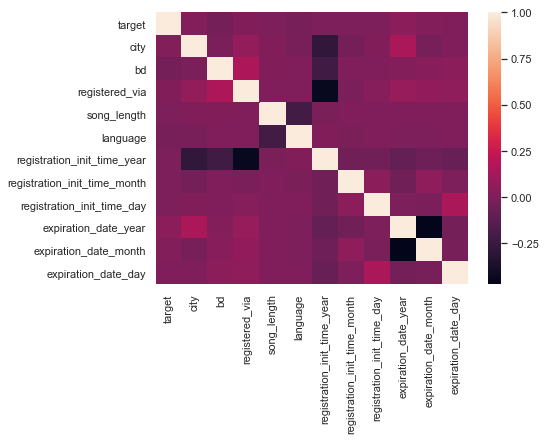

In [47]:
plt.figure(figsize=[7,5])
sns.heatmap(train_full.corr())
plt.show()

### What are the most popular languages?

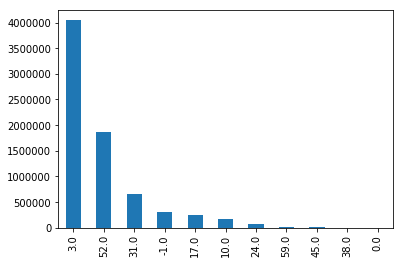

In [34]:
train_full.language.value_counts().plot(kind='bar')

### What are the most popular languages used in repeated songs?

In [40]:
#filter out songs that are repeated, and record how many people play the songs
repeated_songs = train_full[train_full['target'] == 1]

Now dataframe 'repeated_songs' records information of all the songs that are repeated:

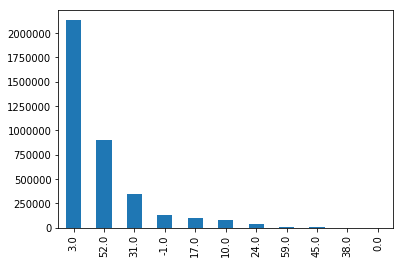

In [39]:
repeated_songs.language.value_counts().plot(kind='bar')

Language 3,52 and 31 are the most popular languages among all the repeated songs, which we found is almost the same as the entire dataset.

### what about the most popular artists?

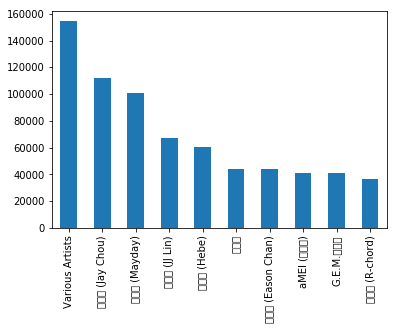

In [40]:
repeated_songs.artist_name.value_counts()[:10].plot(kind='bar')

The top three artists are: various artists, Jay Chow and Mayday, which we found very reseaonable since KKBOX is a Taiwanese music streaming platform, and the most popular artists are Chinese. 

### How do people find songs to listen to?

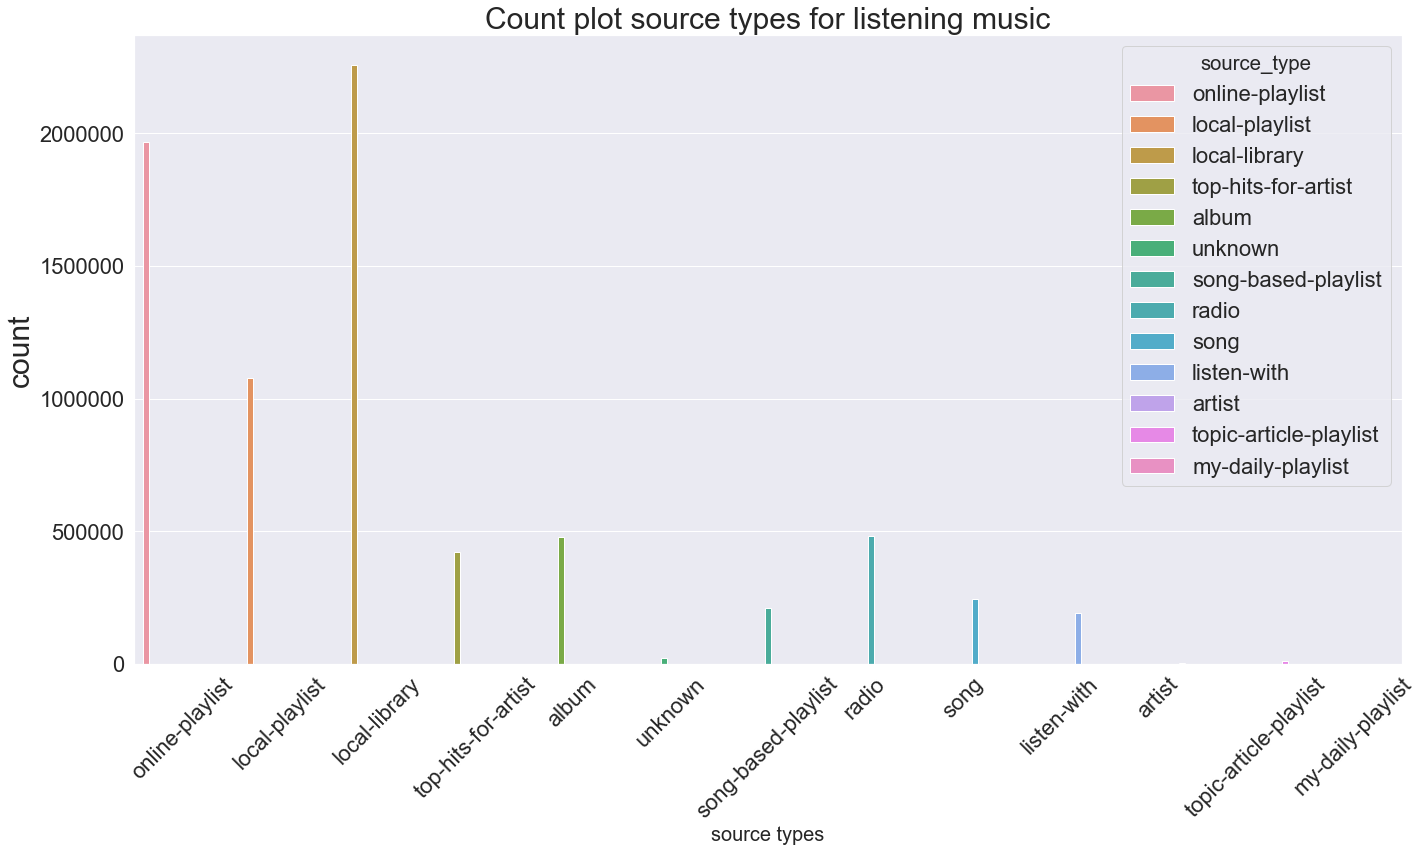

In [46]:
plt.figure(figsize=(20,12))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train_full)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

### When did thse members register KKBox?

In [49]:
#create a new dataframe that records registration year and number of member registration
year=train_full[['msno','registration_init_time_year']].drop_duplicates().groupby('registration_init_time_year').count()
year.reset_index(level=0,inplace=True)
year.set_axis(['registration_init_time_year','count'],axis=1,inplace=True)

In [50]:
year.head()

,registration_init_time_year,count
0,2004,256
1,2005,382
2,2006,491
3,2007,678
4,2008,498


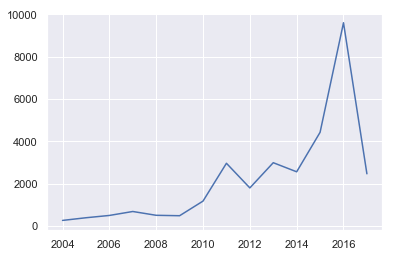

In [51]:
plt.plot(year['registration_init_time_year'],year['count'])

## Part 3: Building predictive model

### 1. random forest

In [52]:
X_tree= train_full.drop(['target', 'registration_init_time', 'expiration_date'], axis = 1)
y_tree = train_full['target']   

In [53]:
# Object data to category
for col in X_tree.select_dtypes(include=['object']).columns:
    X_tree[col] = X_tree[col].astype('category')

In [54]:
# Encoding categorical features
for col in X_tree.select_dtypes(include=['category']).columns:
    X_tree[col] = X_tree[col].cat.codes

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tree,y_tree, test_size=0.99, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [57]:
X_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,song_length,...,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,count_artist_played
104981,18111,220078,3,8,3,1,28.72,2,7,219475.00,...,0,0,0,0,0,0,0,1,531,1115
2854500,30138,118522,3,8,4,5,24.00,1,9,108576.00,...,0,1,0,0,0,0,1,1,407,18786
6124621,26284,147905,0,5,6,11,36.00,1,4,202501.00,...,1,3,0,0,0,0,0,1,116,3915
433261,552,131220,3,8,3,13,32.00,1,9,268190.00,...,0,0,0,0,0,0,0,0,6,226
7318005,2489,262823,5,14,7,1,28.72,2,7,281391.00,...,0,1,0,0,0,0,0,0,349,26722


In [58]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 25)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
rf_pred = rf_model.predict(X_test)

In [63]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.65      0.60      0.63     34977
           1       0.63      0.68      0.65     35023

   micro avg       0.64      0.64      0.64     70000
   macro avg       0.64      0.64      0.64     70000
weighted avg       0.64      0.64      0.64     70000



In [59]:
df_plot = pd.DataFrame({'features': X_train.columns,
                        'importances': rf_model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

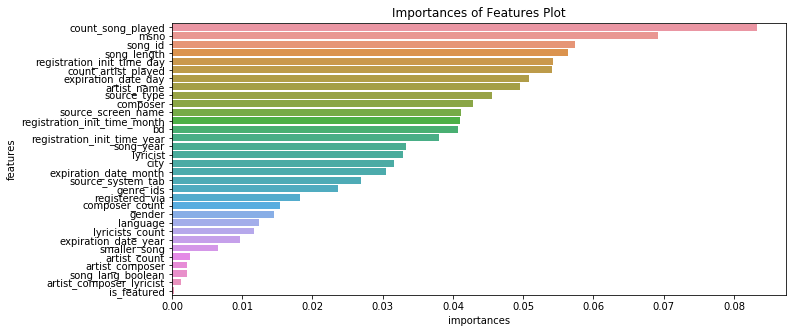

In [60]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [61]:
# Drop columns with importances < 0.03 and show what kind of columns we dropped
drop = df_plot.features[df_plot.importances < 0.033].tolist()
drop

['lyricist',
 'city',
 'expiration_date_month',
 'source_system_tab',
 'genre_ids',
 'registered_via',
 'composer_count',
 'gender',
 'language',
 'lyricists_count',
 'expiration_date_year',
 'smaller_song',
 'artist_count',
 'artist_composer',
 'song_lang_boolean',
 'artist_composer_lyricist',
 'is_featured']

In [ ]:
# Drop columns with importances < 0.03
X_train = X_train.drop(df_plot.features[df_plot.importances < 0.03].tolist(), 1)

In [ ]:
# Selected columns
X_train.columns

### 2. XGboost

Because there are too many levels in composer, lyricist and artist_name, so we only dummy the top 100 artist,composer and lyricist. We named the rest as others.

In [42]:
from sklearn.model_selection import train_test_split
X = train_full.drop(['target', 'registration_init_time', 'expiration_date'], axis = 1)
y = train_full['target']   

In [43]:
X_test = test_full.drop(['id'], axis=1)
ids = test_full['id'].values

In [44]:
# Object data to category
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category')

for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col] = X_test[col].astype('category')

In [69]:
X.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,song_length,...,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,count_artist_played
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,28.72,unknown,7,206471.00,...,0,2,0,0,0,0,0,1,215,1140
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,13,24.00,female,9,284584.00,...,0,0,0,0,0,0,0,0,1,303311
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,13,24.00,female,9,225396.00,...,0,1,0,0,0,0,0,1,4,289
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,13,24.00,female,9,255512.00,...,0,1,0,0,0,0,0,0,1,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,28.72,unknown,7,187802.00,...,0,3,0,0,0,0,0,1,411,426


In [45]:
t_dummy = pd.get_dummies(X,columns = ['source_system_tab','source_screen_name', 'source_type'])

In [71]:
t_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7370018 entries, 0 to 7377417
Columns: 372 entries, msno to composer_鼓鼓
dtypes: category(4), float64(4), int64(10), int8(8), uint8(346)
memory usage: 3.3 GB


In [46]:
# Encoding categorical features
X = t_dummy
for col in X.select_dtypes(include=['category']).columns:
    X[col] = X[col].cat.codes

In [42]:
X.head()

,msno,song_id,city,bd,gender,registered_via,song_length,genre_ids,language,registration_init_time_year,...,composer_陳皓宇,composer_陳零九,composer_陶喆,composer_陶山,composer_韋禮安,composer_頑童MJ116,composer_饒善強,composer_鴉片丹,composer_黃明志,composer_鼓鼓
0,8151,74664,1,28.722607,2,7,206471,285,52.0,2012,...,0,0,0,0,0,0,0,0,0,0
1,17244,223441,13,24.000000,0,9,284584,90,52.0,2011,...,0,0,0,0,0,0,0,0,0,0
2,17244,120735,13,24.000000,0,9,225396,90,52.0,2011,...,0,0,0,0,0,0,0,0,0,0
3,17244,23700,13,24.000000,0,9,255512,6,-1.0,2011,...,0,0,0,0,0,0,0,0,0,0
4,8151,33298,1,28.722607,2,7,187802,2,52.0,2012,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#try the same to X_test
X_test = pd.get_dummies(X_test,columns = ['source_system_tab','source_screen_name', 'source_type','artist_name','lyricist','composer'])
for col in X_test.select_dtypes(include=['category']).columns:
    X_test[col] = X_test[col].cat.codes

In [50]:
X_tr, X_val, y_tr, y_val = train_test_split(X,y, test_size=0.99, random_state=42)

In [51]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

In [52]:
model = xgb.XGBClassifier(learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=250,objective = 'binary:logistic')
model.fit(X_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=15, min_child_weight=3, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [53]:
X_val= X_val[0:50000]
y_val =y_val[0:50000]

In [54]:
predict_labels = model.predict(X_val)

In [55]:
print(classification_report(y_val, predict_labels))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62     24888
           1       0.63      0.65      0.64     25112

   micro avg       0.63      0.63      0.63     50000
   macro avg       0.63      0.63      0.63     50000
weighted avg       0.63      0.63      0.63     50000



### 3. LGBM

In [24]:
for col in train_full.columns:
    if train_full[col].dtype == object:
        train_full[col] = train_full[col].astype('category')
        test_full[col] = test_full[col].astype('category')

#small sample as we have no time
#train_use = train_full.iloc[0:73774]
#test_use = test.iloc[0:50000]
# code added end


X_train_LGBM = train_full.drop(['target','registration_init_time','expiration_date'], axis=1)
y_train_LGBM = train_full['target'].values




X_test_LGBM = test_full.drop(['id'], axis=1)
ids = test_full['id'].values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_tr_LGBM, X_val_LGBM, y_tr_LGBM, y_val_LGBM = train_test_split(X_train_LGBM, y_train_LGBM)

In [27]:
lgb_train = lgb.Dataset(X_tr_LGBM, y_tr_LGBM)
lgb_val = lgb.Dataset(X_val_LGBM, y_val_LGBM)

In [28]:
params = {
        'objective': 'binary',
        'boosting': 'gbdt',
        'learning_rate': 0.2 ,
        'verbose': 0,
        'num_leaves': 100,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'num_rounds': 100,
        'metric' : 'auc'
    }

lgbm_model = lgb.train(params, train_set = lgb_train, valid_sets = lgb_val, verbose_eval=5)

[5]	valid_0's auc: 0.733853
[10]	valid_0's auc: 0.752171
[15]	valid_0's auc: 0.764637
[20]	valid_0's auc: 0.772573
[25]	valid_0's auc: 0.779485
[30]	valid_0's auc: 0.783051
[35]	valid_0's auc: 0.786811
[40]	valid_0's auc: 0.789082
[45]	valid_0's auc: 0.790724
[50]	valid_0's auc: 0.79279
[55]	valid_0's auc: 0.794002
[60]	valid_0's auc: 0.795684
[65]	valid_0's auc: 0.797137
[70]	valid_0's auc: 0.798851
[75]	valid_0's auc: 0.799717
[80]	valid_0's auc: 0.800208
[85]	valid_0's auc: 0.800936
[90]	valid_0's auc: 0.801414
[95]	valid_0's auc: 0.802064
[100]	valid_0's auc: 0.80316


In [29]:
predictions = lgbm_model.predict(X_val_LGBM)

In [31]:
from sklearn.metrics import classification_report

In [33]:
for i in range(len(predictions)):
    if predictions[i] > 0.6:
        predictions[i] = 1
    else:
        predictions[i] = 0
predictions

array([0., 0., 1., ..., 1., 0., 1.])

In [34]:
print(classification_report(y_val_LGBM, predictions))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74    915187
           1       0.79      0.58      0.67    927318

   micro avg       0.71      0.71      0.71   1842505
   macro avg       0.73      0.71      0.71   1842505
weighted avg       0.73      0.71      0.71   1842505

